In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import my_tools as tools

df_cases_new = pd.read_csv('data/cases_new.csv').set_index('Date')
df_cases_new.name= 'New cases'
df_cases_total = pd.read_csv('data/cases_total.csv').set_index('Date')
df_cases_total.name = 'Total cases'

df_deaths_new = pd.read_csv('data/deaths_new.csv').set_index('Date')
df_deaths_new.name = 'New deaths'
df_deaths_total = pd.read_csv('data/deaths_total.csv').set_index('Date')
df_deaths_total.name = 'Total deaths'

df_population = pd.read_csv('data/population_total.csv').set_index('country')
df_population.name = 'Population'
df_population_dens = pd.read_csv('data/population_density_per_square_km.csv').set_index('country')
df_population_dens.name = 'Population density, per square km'

In [49]:
countries = df_cases_new.columns.tolist()

current_populations = df_population.loc[countries]['2020']

/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


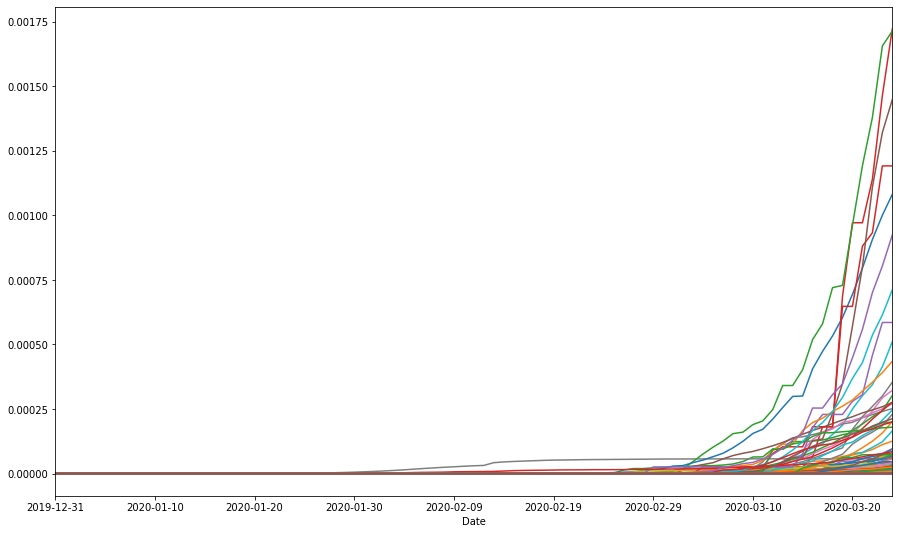

In [50]:
df_cases_relative = df_cases_total.copy()
df_cases_relative.name = 'Percent of population expected infected'

for country in df_cases_relative.columns:
    df_cases_relative[country] = df_cases_relative[country] / current_populations[country]
    
df_cases_relative.plot(legend=False, figsize=(15,9))
plt.show()

In [41]:
df_deaths_relative = df_deaths_total.copy()
df_deaths_relative.name = 'Percent of cases that died'

for country in df_deaths_relative.columns:
    for ind in df_deaths_relative.index:
        if df_cases_total.at[ind, country] != 0:
            df_deaths_relative = df_deaths_total / df_cases_total

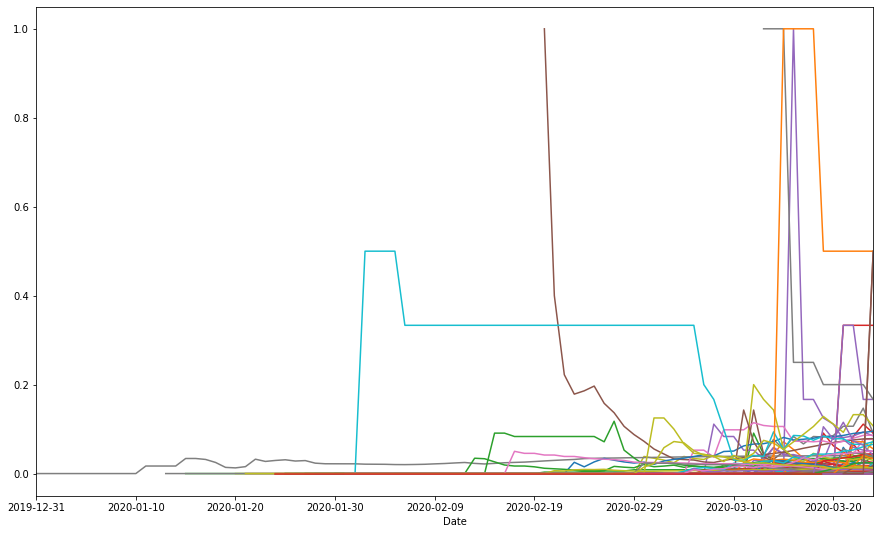

In [45]:
df_deaths_relative.plot(legend=False, figsize=(15,9))
plt.show()